In [1]:
import xarray as xr

ds = xr.open_dataset('data.nc').sel(expver=1)


In [2]:
da = ds.time.dt.year
da

<xarray.DataArray 'year' (time: 500)> Size: 4kB
array([1979, 1979, 1979, ..., 2020, 2020, 2020], dtype=int64)
Coordinates:
    expver   int32 4B 1
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2020-08-01
Attributes:
    long_name:  time

Merging a new variable into the dataset

In [3]:
ds_1 = ds.merge(da)
ds_1

<xarray.Dataset> Size: 152MB
Dimensions:    (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude  (longitude) float32 568B -82.0 -81.75 -81.5 ... -47.0 -46.75
  * latitude   (latitude) float32 356B 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 4B 1
  * time       (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float64 51MB ...
    skt        (time, latitude, longitude) float64 51MB ...
    tp         (time, latitude, longitude) float64 51MB ...
    year       (time) int64 4kB 1979 1979 1979 1979 1979 ... 2020 2020 2020 2020
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

'Squared-Distance' variable - dependant on two dimensions (lat & long)

In [5]:
da = ds.longitude **2 + ds.latitude ** 2
da.name = 'squared_distance'

ds_2 = ds.merge(da)
ds_2

<xarray.Dataset> Size: 152MB
Dimensions:           (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude         (longitude) float32 568B -82.0 -81.75 ... -47.0 -46.75
  * latitude          (latitude) float32 356B 6.0 5.75 5.5 ... -15.75 -16.0
    expver            int32 4B 1
  * time              (time) datetime64[ns] 4kB 1979-01-01 ... 2020-08-01
Data variables:
    lai_hv            (time, latitude, longitude) float64 51MB ...
    skt               (time, latitude, longitude) float64 51MB ...
    tp                (time, latitude, longitude) float64 51MB ...
    squared_distance  (longitude, latitude) float32 51kB 6.76e+03 ... 2.442e+03
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [6]:
ds_3 = ds_1.merge(ds_2)
ds_3

<xarray.Dataset> Size: 152MB
Dimensions:           (longitude: 142, latitude: 89, time: 500)
Coordinates:
  * longitude         (longitude) float32 568B -82.0 -81.75 ... -47.0 -46.75
  * latitude          (latitude) float32 356B 6.0 5.75 5.5 ... -15.75 -16.0
    expver            int32 4B 1
  * time              (time) datetime64[ns] 4kB 1979-01-01 ... 2020-08-01
Data variables:
    lai_hv            (time, latitude, longitude) float64 51MB 0.0 0.0 ... nan
    skt               (time, latitude, longitude) float64 51MB 300.7 ... nan
    tp                (time, latitude, longitude) float64 51MB 0.0004338 ... nan
    year              (time) int64 4kB 1979 1979 1979 1979 ... 2020 2020 2020
    squared_distance  (longitude, latitude) float32 51kB 6.76e+03 ... 2.442e+03
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [7]:
ds_sqroot = ds_3 ** (1/2)
ds_cuberoot = ds_3 ** (1/3)
ds_4 = xr.concat([ds_sqroot, ds_cuberoot, ds_3], 'dim_power')
ds_4

<xarray.Dataset> Size: 455MB
Dimensions:           (longitude: 142, latitude: 89, time: 500, dim_power: 3)
Coordinates:
  * longitude         (longitude) float32 568B -82.0 -81.75 ... -47.0 -46.75
  * latitude          (latitude) float32 356B 6.0 5.75 5.5 ... -15.75 -16.0
    expver            int32 4B 1
  * time              (time) datetime64[ns] 4kB 1979-01-01 ... 2020-08-01
Dimensions without coordinates: dim_power
Data variables:
    lai_hv            (dim_power, time, latitude, longitude) float64 152MB 0....
    skt               (dim_power, time, latitude, longitude) float64 152MB 17...
    tp                (dim_power, time, latitude, longitude) float64 152MB 0....
    year              (dim_power, time) float64 12kB 44.49 44.49 ... 2.02e+03
    squared_distance  (dim_power, longitude, latitude) float32 152kB 82.22 .....
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

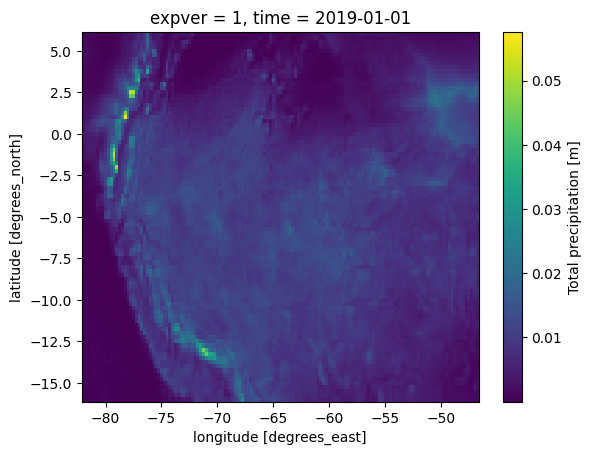

In [8]:
ds.sel(time='2019-01-01').tp.plot()

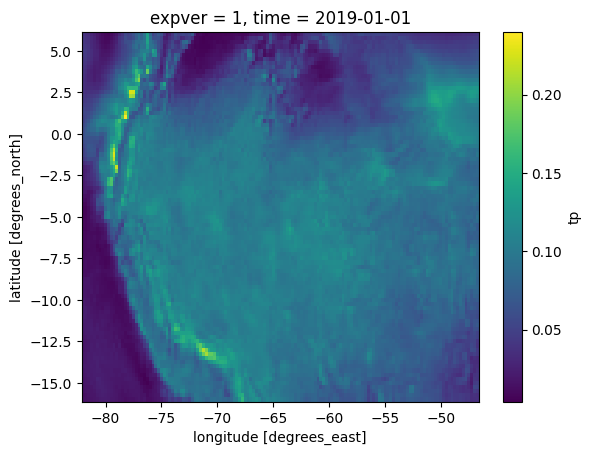

In [9]:
ds_4.sel(dim_power = 0, time='2019-01-01').tp.plot()

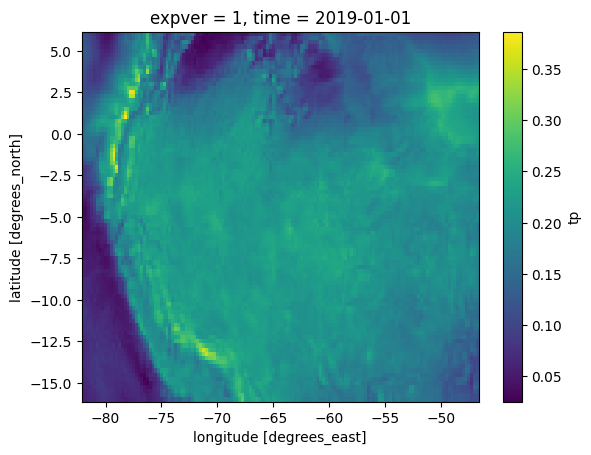

In [10]:
ds_4.sel(dim_power = 1, time='2019-01-01').tp.plot()

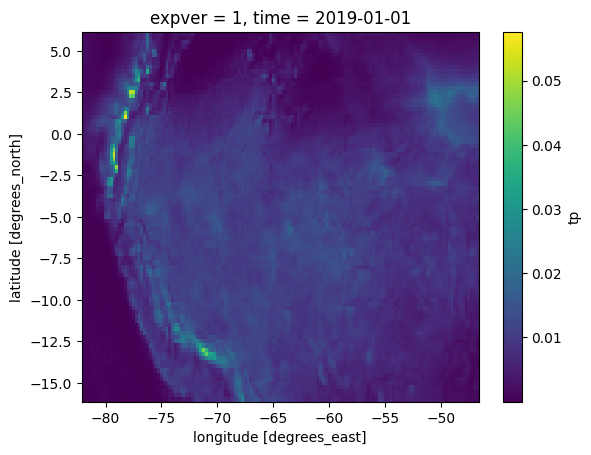

In [11]:
ds_4.sel(dim_power = 2, time='2019-01-01').tp.plot()